# Quaternion Triple Products and Distance

by Doug Sweetser, sweetser@alum.mit.edu - please feel free to email

In this IPython notebook, efforts will be made to understand quaternion triple products and how they are related to distances in space and intervals in space-time as seen in special relativity. Rather than follow a historical story, I will try a more abstract approach. Initialize a few tools.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
import Q_tool_devo as qtd;

## Spatial Rotations

Define a triple product function modeled on what it takes to do a spatial rotation, $P R P^*$, where $R$ is a quaternion to be spatially rotated and $P$ is a quaternion parameter to do said rotation.

In [2]:
def triple_sandwich(r, p=qtd.QH([1, 0, 0, 0])):
    """A function that takes 2 quaternions but does a triple product. The default value for P leaves R unchanged."""

    return p.product(r.product(p.conj()))

In [3]:
t, x, y, z = sp.symbols("t x y z")
s, u, v, w = sp.symbols("s u v w")

R = qtd.QH([t, x, y, z])
P = qtd.QH([s, u, v, w])
RP_sandwich = triple_sandwich(R, P)
sp.simplify(RP_sandwich.t)

The first term is just the norm of the parameter $P$ times the scalar value of $R$, how simple! Rotating a value is complicated.

In [4]:
sp.simplify(RP_sandwich.x)

Show the interval of $R$ is unchanged up to the norm of the parameter $P$:

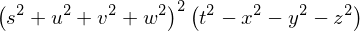

In [5]:
sp.simplify(sp.factor(RP_sandwich.square().t))

The interval will be invariant so long as the norm of the parameter $P$ is equal to one. A common way to do this is to use sine and cosine functions due to the trig identity $\sin^2(\theta) + \cos^2(\theta) = 1$.

In [6]:
def triple_trig_z(r, a):
    """A rotation around the z axis only by the double angle of a."""
    
    return triple_sandwich(r, qtd.QH([sp.cos(a), 0, 0, sp.sin(a)]))

def is_quadratic(r):
    """Tests if the the first term of the square of a quaternion is equal to t^2 - x^2 - y^2 - z^2."""
    
    r2 = r.square()
    simple_r2 = sp.simplify(r2.t)
    it_is = ((simple_r2 == 1.0*t**2 - 1.0*x**2 - 1.0*y**2 - 1.0*z**2) 
             or (simple_r2 == t**2 - x**2 - y**2 - z**2))
    
    if it_is:
        display(t**2 - x**2 - y**2 - z**2)
    else:
        display(simple_r2)
        
    return it_is

In [7]:
α = sp.Symbol('α')
display(sp.simplify(triple_trig_z(R, α).t))
display(sp.simplify(triple_trig_z(R, α).x))
display(sp.simplify(triple_trig_z(R, α).y))
display(sp.simplify(triple_trig_z(R, α).z))
is_quadratic(triple_trig_z(R, α))

True

An important thing to notice is that rotations work for arbitrarily small values of an angle.

In [8]:
display(sp.simplify(triple_trig_z(R, 0.01).t))
display(sp.simplify(triple_trig_z(R, 0.01).x))
display(sp.simplify(triple_trig_z(R, 0.01).y))
display(sp.simplify(triple_trig_z(R, 0.01).z))
is_quadratic(triple_trig_z(R, 0.01))

True

This is relevant to the fact that the group $SO(3)$ is a compact group. It is easy to visualize the example above: it is a circle in the $xy$ plane with $t$ and $z$ unaltered. Circles are sets of points where the "next" point is an arbitrarily short distance away.

Can we create a function that can take _any_ quaternion parameter $P$ yet still always generate another member of the group $SO(3)$? This can be done using the inverse of a quaternion which is the conjugate of a quaternion divided by the norm squared. Groups are about binary operations on a set. The binary operation can be a composite function, where the results of one rotation are fed into another.

In [9]:
def next_rotation(r, p=qtd.QH([1, 0, 0, 0])):
    """Generates another member of the rotation group given a quaternion parameter P."""
    
    return p.product(r.product(p.invert()))

def composite_rotation(r, p1=qtd.QH([1, 0, 0, 0]), p2=qtd.QH([1, 0, 0, 0])):
    """A composite function of next_rotation."""
    
    return next_rotation(next_rotation(r, p1), p2)

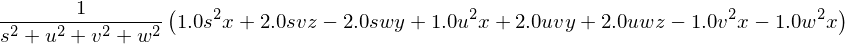

True

In [10]:
display(sp.simplify(composite_rotation(R, qtd.QH([s, u, v, w])).t))
display(sp.simplify(composite_rotation(R, qtd.QH([s, u, v, w])).x))
is_quadratic(composite_rotation(R, qtd.QH([s, u, v, w])))

The next_rotation function can use any quaternion parameter $P$ as input and create another member of the group. This does not mean that rotations have four degrees of freedom. There is an equivalence relation involved since the product of a quaternion with its inverse has a norm of one. This algebraic constraint means the composite_rotation function has $4-1=3$ degrees of freedom.

The composite_rotation function could be used to show that there is a real-valued quaternion representation of the compact Lie group $SO(3)$. Since it is well known quaternions can do this, such an effort will be skipped.

## Other Triple Products Lead to More Than Just Rotations

Other triple products are possible. For example, the two quaternions could be on the same side. A number of years ago, a search for a real-valued quaternion function that could do a Lorentz boost turned up this difference between two one-sided triples, $ \frac{1}{2}((P P R)^* - (P^* P^* R)^*)$:

In [11]:
def triple_2_on_1(r, p=qtd.QH([1, 0, 0, 0])):
    """The two are on one side, minus a different two on one side."""
    
    ppr = p.product(p.product(r)).conj()
    pcpcr = p.conj().product(p.conj().product(r)).conj()
    pd = ppr.dif(pcpcr)
    pd_ave = pd.product(qtd.QH([1/2, 0, 0, 0]))
    return pd_ave

In [12]:
rq_321 = triple_2_on_1(R, P)
display(sp.simplify(rq_321.t))
display(sp.simplify(rq_321.x))
display(sp.simplify(rq_321.y))
display(sp.simplify(rq_321.z))

If $s=0$, then triple_2_on_1 would contribute nothing.

Explore the hyperbolic sine and cosines:

In [13]:
phx = qtd.QH([sp.cosh(α), sp.sinh(α), 0, 0])
ppr = triple_2_on_1(R, phx)
display(sp.simplify(ppr.t))

This is promising for doing a Lorentz boost. There is a direct link between hyperbolic trig functions and the relativistic velocity $\beta$ and stretch factor $\gamma$ of special relativity.

$$\gamma = \cosh(\alpha)$$
$$\beta \gamma = \sinh(\alpha)$$

The trig functions are based on a circle in the plane, while the hyperbolic trig functions start with hyperbolas. The definitions are remarkably similar:

$$\sin(\alpha) = \frac{e^{i \alpha} - e^{-i \alpha}}{2 i}$$

$$\cos(\alpha) = \frac{e^{i \alpha} + e^{-i \alpha}}{2 i}$$

$$\sinh(\alpha) = \frac{e^{\alpha} - e^{-\alpha}}{2}$$

$$\cosh(\alpha) = \frac{e^{\alpha} + e^{-\alpha}}{2}$$

The hyperbolic trig functions oddly are "more real", never needing an imaginary factor. The hyperbola of the hyperbolic cosine does touch the unit circle at its minimum, suggesting a solitary link to the trig functions.

Combine the three triples and test if they do all the work of a Lorentz boost:
$$\rm{triple-triple}(R, P) \equiv P R P^* + \frac{1}{2}((P P R)^* - (P^* P^* R)^*)$$

In [14]:
def triple_triple(r, p=qtd.QH([1, 0, 0, 0])):
    """Use three triple products for rotations and boosts."""
    
    # Note: 'qtype' provides a record of what algrabric operations were done to create a quaternion.
    return triple_sandwich(r, p).add(triple_2_on_1(r, p), qtype="triple_triple")

Can this function do a rotation? If the first value of $P$ is equal to zero, then the two one-sided triple terms, $PPR$, will make no contribution, leaving the triple sandwich $PRP^*$. So long as the norm is equal to unity, then spatial rotations result. Do a rotation:

In [15]:
jk = qtd.QH([0, 0, 3/5, 4/5])
display(sp.simplify(triple_triple(R, jk).t))
display(sp.simplify(triple_triple(R, jk).x))
display(sp.simplify(triple_triple(R, jk).y))
display(sp.simplify(triple_triple(R, jk).z))
is_quadratic(triple_triple(R, jk))

True

Something important has changed going from the regular trig functions to these hyperbolic functions for rotations. The requirements that the first term must be zero while the other three terms are normalized to unity means that one cannot go an arbitrarily small distance away and find another transformation. If one wants a product of rotations, those rotations must be at right angles to each other.

In [16]:
Qi, Qj, Qk = qtd.QH([0, 1, 0, 0]), qtd.QH([0, 0, 1, 0]), qtd.QH([0, 0, 0, 1])
print(triple_triple(triple_triple(R, Qi), Qj))
print(triple_triple(R, Qi.product(Qj)))

(t, -x, -y, z) triple_triple
(t, -x, -y, z) triple_triple


The fact that one cannot find a super close neighbor is a big technical change.

What is so special about setting the first term equal to zero? Is there a more general form? Perhaps all that is needed is for the first term of the square to be equal to negative one. Test this out:

In [17]:
minus_1 = qtd.QH([2, 2, 1, 0])
print(minus_1.square().t)
display((triple_triple(R, minus_1).t, triple_triple(R, minus_1).x, triple_triple(R, minus_1).y, triple_triple(R, minus_1).z))
is_quadratic(triple_triple(R, minus_1))

-1


True

To be honest, this came as a surprise to me. Notice that the value for time changes, so a rotation is getting mixed in with a boost. This sort of mixing of rotations and boosts is known to happen when one does two boosts, one say along $x$, the other along $y$. Now we can say a similar thing is possible for rotations. If there scalar is zero then one gets a pure spatial rotation. When that is not the case, there is a mixture of rotations and boosts.

Demonstrate that a boost along the $x$ axis works.

In [18]:
bx = qtd.QH([sp.cosh(α), sp.sinh(α), 0, 0])
display(sp.simplify(bx.square().t))
display(sp.simplify(triple_triple(R, bx).t))
display(sp.simplify(triple_triple(R, bx).x))
display(sp.simplify(triple_triple(R, bx).y))
display(sp.simplify(triple_triple(R, bx).z))
is_quadratic(triple_triple(R, bx))

True

Perfect. It was this result that began my investigation of triple_triple quaternion products. This is what the boost looks like using gammas and betas: $$(\gamma t - \gamma \beta x, \gamma x - \gamma \beta t, y, z)$$

The first term of the square of the hyperbolic parameter $P=bx$ is equal to positive one. So long as the triple_triple function is fed a quaternion parameter $P$ whose first term of the square has an absolute value of one, the interval is invariant. That is surprisingly simple.

Note the double angle in the hyperbolic trig function that appeared earlier for rotations.

## Spatial Reflection and Time Reversal

For a spatial reflection, just one spatial term flips signs. The first term of the square will not be altered. Yet the triple_triple function cannot flip only one sign. It can flip two terms. Thus, using just the triple_triple function one can go from all positive, to two positive-two negative, to all negative terms, but never one or three negative terms starting from an all positive quaternion $R$. The conjugate operator can do odd sign changes. Do a spatial reflection on $x$ only by rotating using $i$ and using the conjugate operator like so:

In [19]:
x_reflection = triple_triple(R, Qi).conj()
print(x_reflection)
is_quadratic(x_reflection)

(t, -x, y, z) triple_triple.*


True

Time reversal also cannot be done using triple_triple. The parameter $P$ is used twice, so its sign is of no consequence for the scalar in $R$. The entire quaternion $R$ must be multiplied by $-1$ then take a conjugate like so:

In [20]:
t_reversal = triple_triple(R).conj().product(qtd.QH([-1, 0, 0, 0], qtype="sign_flip"))
print(t_reversal)
is_quadratic(t_reversal)

(-t, x, y, z) triple_triple.*xsign_flip


True

Rotations and boosts do not do the work of time reversal. Time reversal requires different algebraic tricks.

## Fixing the Limitations of the Triple_Triple Function

The triple_triple function must be fed quaternions whose square is either exactly equal to plus or minus one. Create a function that can take in _any_ quaternion as a parameter and generate the next quadratic. The function must be scaled to the square root of the first term of the quaternion parameter $P$ squared. Expand the parameters so both spatial reflections and time reversals can be done.

If the parameter $P$ is light-like, it cannot be used to do a boost. Feed the triple_triple function a light-like quaternion and it will always return zero. Light-like quaternions can do rotations. The next_rotation function is up to the task.

In [21]:
def next_quadratic(r, p=qtd.QH([1, 0, 0, 0]), conj=False, sign_flip=False):
    """Generates another quadratic using a quaternion parameter p, 
    if given any quaternion and whether a conjugate or sign flip is needed."""
    
    pt_squared = p.square().t
    
    # Avoid using sp.Abs() so equations can be simplified.
    if isinstance(pt_squared, (int, float)):
        if pt_squared < 0:
            pt_squared *= -1
    else:
        if pt_squared.is_negative:
            pt_squared *= -1
        
    sqrt_pt_squared = sp.sqrt(pt_squared)
    
    # A light-like parameter P can rotate but not boost R.
    if sqrt_pt_squared == 0:
        rot_calc = next_rotation(r, p) 
    else:
        p_normalized = p.product(qtd.QH([1/sqrt_pt_squared, 0, 0, 0]))
        rot_calc = triple_triple(r, p_normalized)
    
    if conj:
        conj_calc = rot_calc.conj()
    else:
        conj_calc = rot_calc
        
    if sign_flip:
        sign_calc = conj_calc.product(qtd.QH([-1, 0, 0, 0]))
    else:
        sign_calc = conj_calc
            
    calc_t = sp.simplify(sp.expand(sign_calc.t))
    calc_x = sp.simplify(sp.expand(sign_calc.x))
    calc_y = sp.simplify(sp.expand(sign_calc.y))
    calc_z = sp.simplify(sp.expand(sign_calc.z))
    
    return qtd.QH([calc_t, calc_x, calc_y, calc_z], qtype="L")

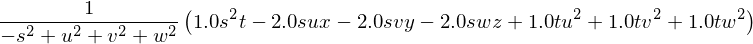

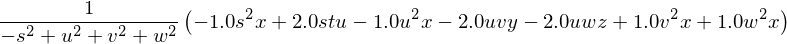

True

In [22]:
display(sp.simplify(next_quadratic(R, P, True, True).t))
display(sp.simplify(next_quadratic(R, P, True, True).x))
is_quadratic(next_quadratic(R, P, True, True))

No matter what values are used for the parameter $P$, the next_quadratic function will preserve the interval of $R$. Even a light-like interval works:

In [23]:
print(next_quadratic(R, qtd.QH([s, s, 0, 0])))
is_quadratic(next_quadratic(R, qtd.QH([s, s, 0, 0])))

(1.0*t, 1.0*x, -1.0*z, 1.0*y) L


True

Notice how the $y$ and $z$ terms flip positions, but the squaring process will put both into their proper spots in the first term of the square.

## The Lorentz Group and Functional Composition with the next_quadratic Function

The Lorentz group is all possible ways to transform an event in space-time yet preserve the quadratic form:
$$(t, x, y, z) \rightarrow t^2 - x^2 - y^2 - z^2$$
The elements of the group are the tuples (t, x, y, z) but not the rotation angles, boost velocities, conjugation and sign flips.

A group is defined as a binary operation on a set of elements that has 4 qualities:
1. Closure
1. An inverse exists
1. There is an identity element
1. Associative

The next_quadratic function acts on one element of the group. The binary operation is a composite function built from two next_quadratic functions. Take the result of one action of the next_quadratic function, and have that result go into another round of the next_quadratic function.

In [24]:
def composite_quadratic(r, p1=qtd.QH([1, 0, 0, 0]), p2=qtd.QH([1, 0, 0, 0]), conj1=False, conj2=False, sign_flip1=False, sign_flip2=False):
    """A composite function for the next_quadratic function."""
    
    return next_quadratic(next_quadratic(r, p1, conj1, sign_flip1), p2, conj2, sign_flip2)

In [25]:
print(composite_quadratic(R))
is_quadratic(composite_quadratic(R))
print(composite_quadratic(R, Qi, Qj, True, True, True, False))
is_quadratic(composite_quadratic(R, Qi, Qj, True, True, True, False))
print(composite_quadratic(R, minus_1, Qj, False, True, False, True))
is_quadratic(composite_quadratic(R, minus_1, Qj, False, True, False, True))
print(composite_quadratic(R, bx, P, True, False, True, False))
is_quadratic(composite_quadratic(R, bx, P, True, False, True, False))
print(composite_quadratic(composite_quadratic(R, bx, bx)))
is_quadratic(composite_quadratic(composite_quadratic(R, bx, bx)))

(t, x, y, z) L


(-t, x, y, -z) L


(-9*t + 8.0*x + 4.0*y, 8.0*t - 7*x - 4*y, -4.0*t + 4*x + y, z) L


((1.0*s**2*t*cosh(2*α) - 1.0*s**2*x*sinh(2*α) - 2.0*s*t*u*sinh(2*α) + 2.0*s*u*x*cosh(2*α) + 2.0*s*v*y + 2.0*s*w*z + 1.0*t*u**2*cosh(2*α) + 1.0*t*v**2*cosh(2*α) + 1.0*t*w**2*cosh(2*α) - 1.0*u**2*x*sinh(2*α) - 1.0*v**2*x*sinh(2*α) - 1.0*w**2*x*sinh(2*α))/(-s**2 + u**2 + v**2 + w**2), -(-1.0*s**2*t*sinh(2*α) + 1.0*s**2*x*cosh(2*α) + 2.0*s*t*u*cosh(2*α) - 2.0*s*u*x*sinh(2*α) - 1.0*t*u**2*sinh(2*α) + 1.0*t*v**2*sinh(2*α) + 1.0*t*w**2*sinh(2*α) + 1.0*u**2*x*cosh(2*α) + 2.0*u*v*y + 2.0*u*w*z - 1.0*v**2*x*cosh(2*α) - 1.0*w**2*x*cosh(2*α))/(-s**2 + u**2 + v**2 + w**2), -(1.0*s**2*y + 2.0*s*t*v*cosh(2*α) - 2.0*s*v*x*sinh(2*α) - 2.0*t*u*v*sinh(2*α) - 1.0*u**2*y + 2.0*u*v*x*cosh(2*α) + 1.0*v**2*y + 2.0*v*w*z - 1.0*w**2*y)/(-s**2 + u**2 + v**2 + w**2), -(1.0*s**2*z + 2.0*s*t*w*cosh(2*α) - 2.0*s*w*x*sinh(2*α) - 2.0*t*u*w*sinh(2*α) - 1.0*u**2*z + 2.0*u*w*x*cosh(2*α) - 1.0*v**2*z + 2.0*v*w*y + 1.0*w**2*z)/(-s**2 + u**2 + v**2 + w**2)) L


(2.0*t*cosh(2*α)**2 - 1.0*t - 1.0*x*sinh(4*α), -1.0*t*sinh(4*α) + 2.0*x*cosh(2*α)**2 - 1.0*x, 1.0*y, 1.0*z) L


True

Each of these composite functions generates exactly the same quadratic as required to be part of the Lorentz group. These five examples argue for closure: every possible choice for what one puts in the composite_quadratic function will have the same quadratic. I don't have the math skills to prove closure (unless one thinks the earlier general case is enough).

Quaternions are a division algebra. As such, it is reasonable to expect an inverse to exist. Look for one for the $Qi$, $Qk$ parameter case:

In [26]:
print(composite_quadratic(R, Qi, Qj, True, True, True, False))
print(composite_quadratic(composite_quadratic(R, Qi, Qj, True, True, True, False), Qk))

(-t, x, y, -z) L
(-t, -x, -y, -z) L


Close, but not quite. Add a sign_flip.

In [27]:
print(composite_quadratic(composite_quadratic(R, Qi, Qj, True, True, True, False), Qk, sign_flip1=True))

(t, x, y, z) L


The is back where we started with the quaternion $R$. Again, this is just an example and not a proof. Some inverses are easier to find than others like pure rotations or pure boosts with a rotation or opposite velocity.

The identity composition was shown to do its fine work in the first composite_quadratic(R) example.

Composite functions are associative, at least according to wikipedia.

## The Difference Between composite_rotation and composite_quadratic

Both of these composite functions call another function twice, next_rotation and next_quadratic respectively. Both functions do a normalization. The next_rotation normalizes to the norm squared which can be zero if the parameter $P$ is zero, otherwise it is positive. The next_rotation function always does one thing, $P R P^{-1}$. The next_quadratic normalizes to the first term of the square of parameter $P$. That value can be positive, negative, or zero. When the first term of the square is positive or negative, the next_quadratic function treats both cases identically. Three triple quaternion products are used, $P R P^* + \frac{1}{2}((P P R)^* - (P^* P^* R)^*)$. The first term is identical to a rotation so long as the norm is equal to one. Otherwise, it is off just by a scaling factor. The difference happens when it is zero which indicates the properties of light come into play. It is the lightcone that separates time-like events from space-like events. For a time-like value of the parameter $P$, the triple-triple returns zero which is not a member of the group. If one uses the first triple, no matter what its norm of light-like parameter $P$ happens to be, the resulting $R->R'$ remains in the group. The rotation group $SO(3)$ is compact, while the Lorentz group $O(1, 3)$ is not. The change in algebra needed for light-light parameter $P$ may be another way to view this difference.

## Degrees of Freedom

The typical representation of the Lorentz group $O(1, 3)$ says there are six independent variables needed to represent the Lorentz group: three for rotations and three for boosts. Yet when one does two boosts in different directions, it is a mix between a boost and a rotation. This suggests there is no such thing as a completely separate notion of rotations and boosts, that they have a capacity to mix. If true, that decreases the degrees of freedom.

Two spacial rotations will result in spacial rotation:

In [28]:
print(composite_quadratic(R, qtd.QH([0, 1,0,1]), qtd.QH([0, 1,1,0])))
is_quadratic(composite_quadratic(R, qtd.QH([0, 1,0,1]), qtd.QH([0, 1,1,0])))

(1.0*t, -1.0*y, 1.0*z, -1.0*x) L


True

Notice that the value of the first squared term is negative. That value gets normalized to negative one in the composite_quadratic function (via the next_quadratic function that gets called twice). What makes these rotations be only spacial is the zero in the first position of the parameter $P$. It is easy enough to look at situations where the first term of the square is negative, and the first term of the parameter is not equal to zero:

In [29]:
print(composite_quadratic(R, qtd.QH([4, 5,0,0])))
is_quadratic(composite_quadratic(R, qtd.QH([4, 5,0,0])))

(4.55555555555556*t - 4.44444444444444*x, -4.44444444444444*t + 4.55555555555556*x, -y, -z) L


True

This is both a boost and a rotation. The boost effect can be seen in the first and second terms where there is a positve and negative term (the negative being the term that "doesn't belong", seeing the $x$ in the first term and $t$ in the second). The rotation appears in the sign flips for $y$ and $z$. If the 4 and 5 are switched, there is no rotation of these terms:

In [30]:
print(composite_quadratic(R, qtd.QH([5, 4,0,0])))

(4.55555555555556*t - 4.44444444444444*x, -4.44444444444444*t + 4.55555555555556*x, y, z) L


The first two terms are exactly the same. Now the last two terms don't flip signs because there is no rotation. Both the (4, 5) and (5, 4) parameter composites will have the same first term for the square. This real-valued quaternion representation makes it possible to see.

At first blush, one looks into the next_quadratic function and sees six degrees of freedom: four for the quaternion parameter $P$, one for the conjugate operator and one for the sign_flip. These last two are needed to generate spatial reflection and time reversal. The quaternion parameter $P$ normalizes to the first term of the square of the quaternion parameter $P$. This means that once three of the values are chosen, then the value of the fourth one is set by this algebraic constraint. The same thing happens with the composite_rotation function defined earlier: a 4D quaternion may go in, but they way it gets normalized means there is an equivalence class to those quaternions that have a norm of one, and thus only 3 degrees of freedom. Representing the Lorentz group with only five degrees of freedom with this real-valued quaternion representation would be an interesting result if it can be rigorously proved.